<a href="https://colab.research.google.com/github/schneider128k/machine_learning_course/blob/master/reuters_newswires_classification_dense_layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reuters newswires dataset

## Loading the newswires dataset

The Reuters dataset is a set of short newswires and their topics, published by Reuters in 1986. It's a simple, widely used toy dataset for text classification. There are 46 different topics. Some topics are more represented than others, but each topic has at least 10 examples in the training set.

In [0]:
%tensorflow_version 2.x
import tensorflow as tf

(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.reuters.load_data(num_words=10000)

TensorFlow 2.x selected.


See [https://keras.io/datasets/#reuters-newswire-topics-classification](https://keras.io/datasets/#reuters-newswire-topics-classification) for all more details.

## Preparing the data

**Code to vectorize the data**

For maximum clarity, let's manually vectorize the data instead of using some build-in functions. (This code is the same as for the IMDB movie reviews dataset.)

In [0]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0
    return results

In [0]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [0]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [0]:
np.sum(x_train[0])

57.0

In [0]:
bag_of_words = set(train_data[0])
len(bag_of_words)

57

**Prepare the labels**

In [0]:
y_train = train_labels
y_test = test_labels

In [0]:
train_labels[0:5]

array([3, 4, 3, 4, 4])

In [0]:
y_train[0:5]

array([3, 4, 3, 4, 4])

## Create validation set

We create a validation set by setting apart 1,000 samples from the original training data to monitor during training the accuracy of the model on data it has never seen before.

In [0]:
x_val = x_train[:1000]
y_val = y_train[:1000]

partial_x_train = x_train[1000:]
partial_y_train = y_train[1000:]

## Build model

In [0]:
def build_and_compile_model():
    # build model
    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Dense(64, activation='relu', input_shape=(10000,)))
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dense(46, activation='softmax'))

    # compile model
    model.compile(optimizer='rmsprop',
                loss='sparse_categorical_crossentropy',
                metrics=['acc'])
    
    return model

## Train model

In [0]:
model = build_and_compile_model()

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 207us/sample - loss: 2.6873 - acc: 0.5233 - val_loss: 1.7790 - val_acc: 0.6510
Epoch 2/20
7982/7982 [==============================] - 1s 137us/sample - loss: 1.4118 - acc: 0.7110 - val_loss: 1.2887 - val_acc: 0.7260
Epoch 3/20
7982/7982 [==============================] - 1s 130us/sample - loss: 1.0249 - acc: 0.7863 - val_loss: 1.0909 - val_acc: 0.7720
Epoch 4/20
7982/7982 [==============================] - 1s 133us/sample - loss: 0.8069 - acc: 0.8297 - val_loss: 1.0067 - val_acc: 0.7840
Epoch 5/20
7982/7982 [==============================] - 1s 128us/sample - loss: 0.6525 - acc: 0.8612 - val_loss: 0.9568 - val_acc: 0.7970
Epoch 6/20
7982/7982 [==============================] - 1s 129us/sample - loss: 0.5270 - acc: 0.8879 - val_loss: 0.9010 - val_acc: 0.8050
Epoch 7/20
7982/7982 [==============================] - 1s 132us/sample - loss: 0.4267 - acc: 0.9124 - val_loss: 0.8851 - va

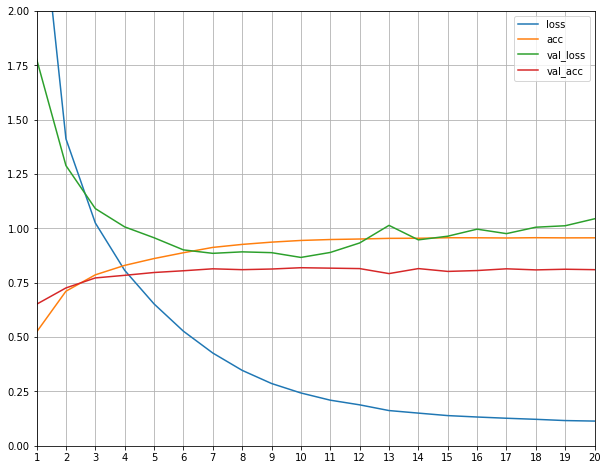

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

pd.DataFrame(history.history).plot(figsize=(10, 8))
plt.grid(True)

plt.gca().set_ylim(0.0, 2.0) 
plt.gca().set_xlim(0, 19)

plt.gca().xaxis.set_major_locator(MultipleLocator(1))

plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _ : int(x + 1)))

plt.show()

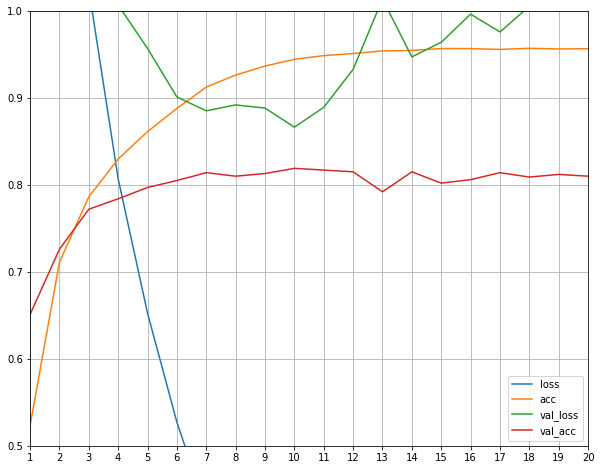

In [0]:
pd.DataFrame(history.history).plot(figsize=(10, 8))
plt.grid(True)

plt.gca().set_ylim(0.5, 1.0) 
plt.gca().set_xlim(0, 19)

plt.gca().xaxis.set_major_locator(MultipleLocator(1))

def format_func(value, _):
    return int(value + 1)

plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _ : int(x + 1)))

plt.show()

We see that the smallest validation loss is achieved at epoch 7.  Training for more epochs leads to overfitting

## Retrain model 

Let's train a new network from scratch for 7 epochs and then evaluate it on the test data.

In [0]:
model = build_and_compile_model()

model.fit(x_train, y_train, epochs=7, batch_size=512)

Train on 8982 samples
Epoch 1/7
8982/8982 [==============================] - 1s 166us/sample - loss: 2.4608 - acc: 0.5135
Epoch 2/7
8982/8982 [==============================] - 1s 121us/sample - loss: 1.3261 - acc: 0.7178
Epoch 3/7
8982/8982 [==============================] - 1s 121us/sample - loss: 0.9972 - acc: 0.7900
Epoch 4/7
8982/8982 [==============================] - 1s 122us/sample - loss: 0.7863 - acc: 0.8334
Epoch 5/7
8982/8982 [==============================] - 1s 120us/sample - loss: 0.6156 - acc: 0.8729
Epoch 6/7
8982/8982 [==============================] - 1s 122us/sample - loss: 0.4888 - acc: 0.8975
Epoch 7/7
8982/8982 [==============================] - 1s 119us/sample - loss: 0.3909 - acc: 0.9173


In [0]:
results = model.evaluate(x_test, y_test)
results

2246/2246 [==============================] - 0s 164us/sample - loss: 0.9281 - acc: 0.7934


[0.9280934369893129, 0.7934105]

This simple approach achieves an accuracy of 80%. 

## Code for displaying movie reviews

In [0]:
# word_index is a dictionary mapping words to an integer index
word_index = tf.keras.datasets.reuters.get_word_index()

# reverse it, mapping integer indices to words
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)

def decode_review(data):
    # note that the indices are offset by 3 because
    # 0, 1, and 2 are reserved indices for 
    # "padding", "start of sequence", and "unknown"
    return ' '.join(
        [reverse_word_index.get(i - 3, '?') for i in data]
    )

In [0]:
import textwrap

def print_review(data):
    print(textwrap.fill(decode_review(data)))

## Analyze predictions

In [0]:
predictions = model.predict(x_test)

**Wrong predictions**

In [0]:
num = 0
for i in range(len(x_test)):
    if np.argmax(predictions[i]) != test_labels[i]:
        print('correct topic    :', test_labels[i])
        print('predicted topic  :', np.argmax(predictions[i]))
        print()
        print_review(test_data[i])
        print('-' * 70)
        print()

        num += 1
        if num == 5:
            break

correct topic    : 4
predicted topic  : 13

? strong south ? winds were keeping many vessels trapped in the ice
off the finnish and swedish coasts in one of the worst icy periods in
the baltic for many years the finnish board of navigation said in
finland and sweden up to 50 vessels were reported to be stuck in the
ice and even the largest of the ? ? were having difficulties in
breaking through to the ? ships ? officials said however icy
conditions in the southern baltic at the soviet oil ports of ? and ?
had eased they said weather officials in neighbouring sweden said the
icy conditions in the baltic were the worst for 30 years with ships
fighting a losing battle to keep moving in the coastal stretches of
the gulf of ? which ? finland and sweden the ice is up to one ? thick
with ? and ? packing it into almost ? walls three metres high swedish
? officials said weather forecasts say winds may ease during the
weekend but a further drop in temperature could bring shipping to a
standstill

**Correct predictions**

In [0]:
num = 0
for i in range(len(x_test)):
    if np.argmax(predictions[i]) == test_labels[i]:
        print('correct topic    :', test_labels[i])
        print('predicted topic  :', np.argmax(predictions[i]))
        print()
        print_review(test_data[i])
        print('-' * 70)
        print()

        num += 1
        if num == 5:
            break

correct topic    : 3
predicted topic  : 3

? the great atlantic and pacific tea co said its three year 345 mln
dlr capital program will be be substantially increased to ? growth and
expansion plans for ? inc and ? inc over the next two years a and p
said the acquisition of ? in august 1986 and ? in december helped us
achieve better than expected results in the fourth quarter ended
february 28 its net income from continuing operations jumped 52 6 pct
to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales
increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the
expanded capital program but it did say it completed the first year of
the program during 1986 a and p is 52 4 pct owned by lt ? ? of west
germany reuter 3
----------------------------------------------------------------------

correct topic    : 10
predicted topic  : 10

? philippine sugar production in the 1987 88 crop year ending august
has been set at 1 6 mln tonnes up from a provisional 1 3 mln tonnes